In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('heart.csv')
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
print(df.isna().sum())
print(df.isnull().any())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool


In [4]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
for i in df.columns:
    if(df[i].dtype=='int64'):
        df[i]=df[i].astype('int16')
    else:
        continue
df.dtypes

Age                 int16
Sex                object
ChestPainType      object
RestingBP           int16
Cholesterol         int16
FastingBS           int16
RestingECG         object
MaxHR               int16
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int16
dtype: object

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.shape

(918, 12)

In [10]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

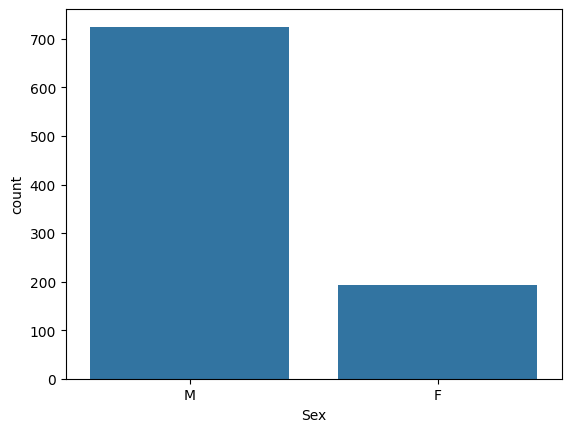

In [11]:
sns.countplot(data=df,x='Sex')

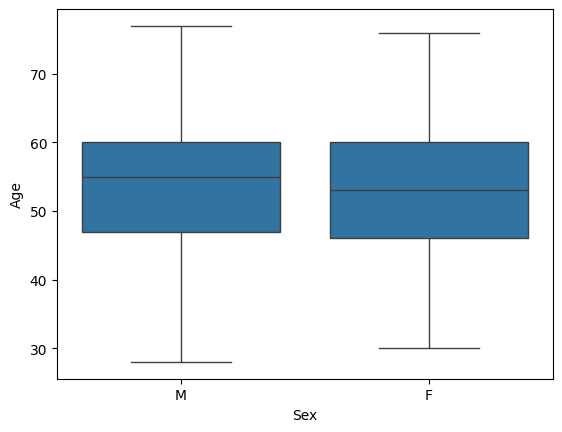

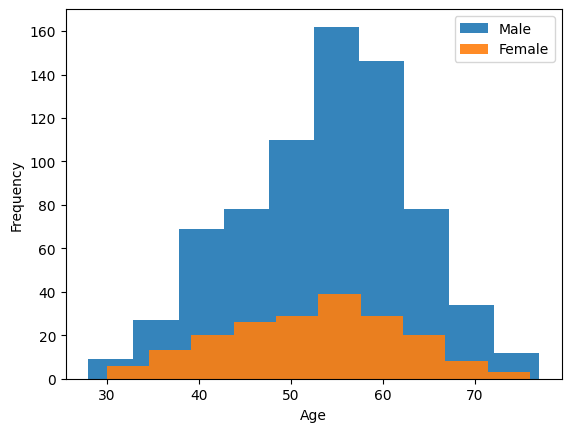

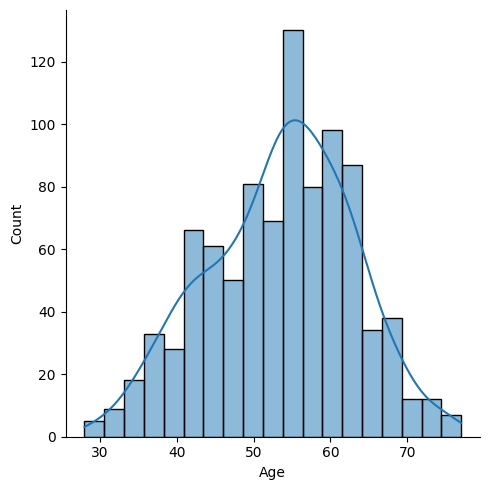

In [12]:
sns.boxplot(x='Sex', y='Age', data=df)
plt.show()

plt.hist(df[df['Sex'] == 'M']['Age'], bins=10, alpha=0.9, label='Male')
plt.hist(df[df['Sex'] == 'F']['Age'], bins=10, alpha=0.9, label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

sns.displot(df['Age'], kde =True)

In [13]:
chest_count=df.ChestPainType.value_counts()
print(chest_count)

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


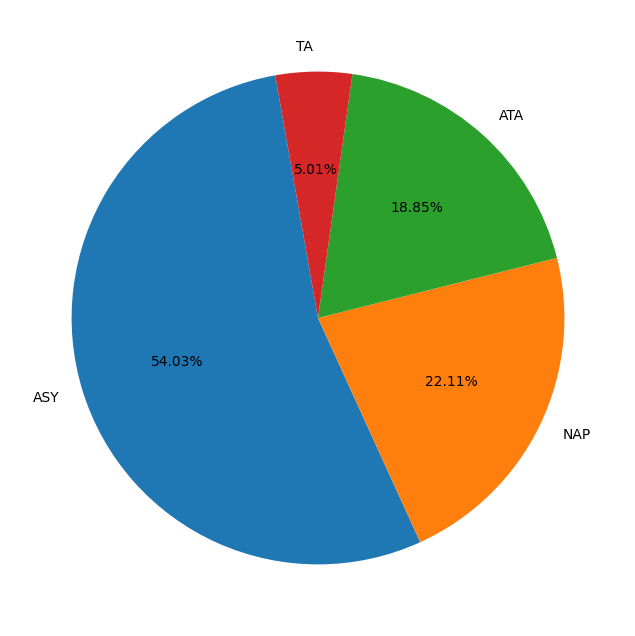

In [14]:
plt.figure(figsize=(16, 8))
plt.pie(chest_count, labels=chest_count.index, autopct='%1.2f%%', startangle=100)
plt.show()

<Axes: xlabel='ChestPainType', ylabel='count'>

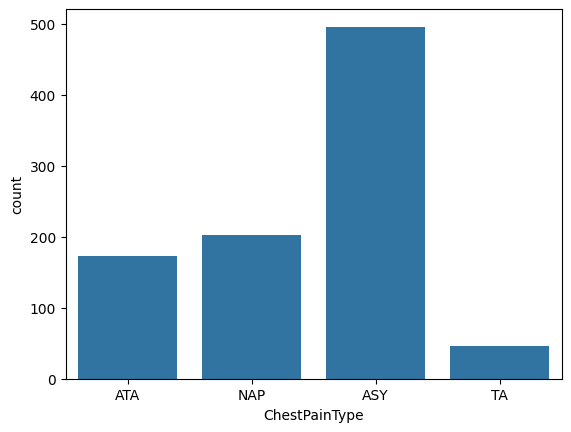

In [15]:
sns.countplot(data=df,x='ChestPainType')

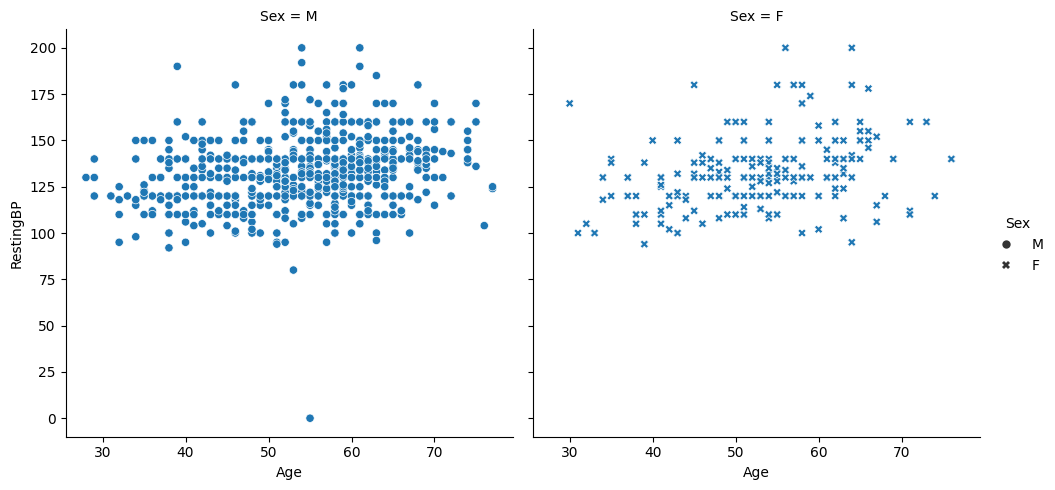

In [16]:
sns.relplot(data=df,x='Age',y='RestingBP',kind='scatter',col='Sex',style='Sex')

<Axes: xlabel='Age', ylabel='RestingBP'>

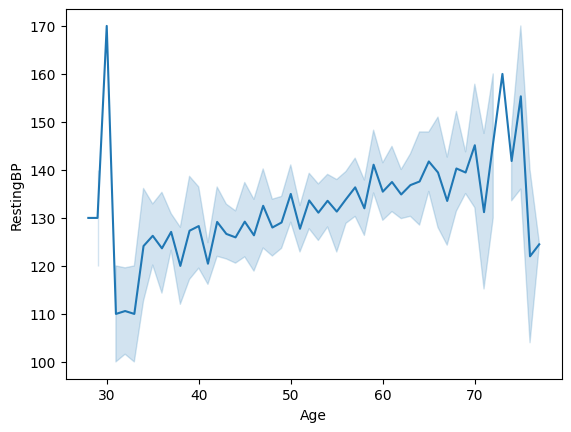

In [17]:
sns.lineplot(data=df,x='Age',y='RestingBP')

In [18]:
df.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

<Axes: xlabel='Cholesterol', ylabel='Sex'>

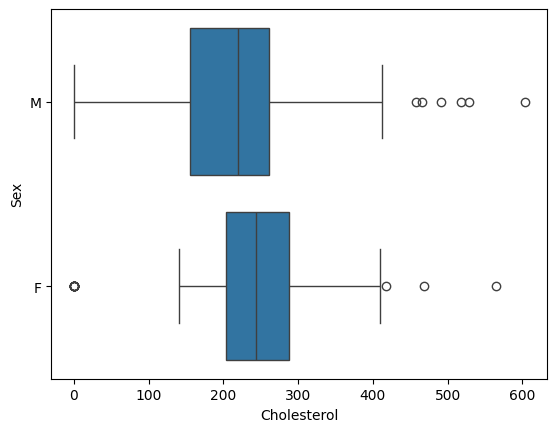

In [19]:
sns.boxplot(data=df,x=df.Cholesterol,y=df.Sex)

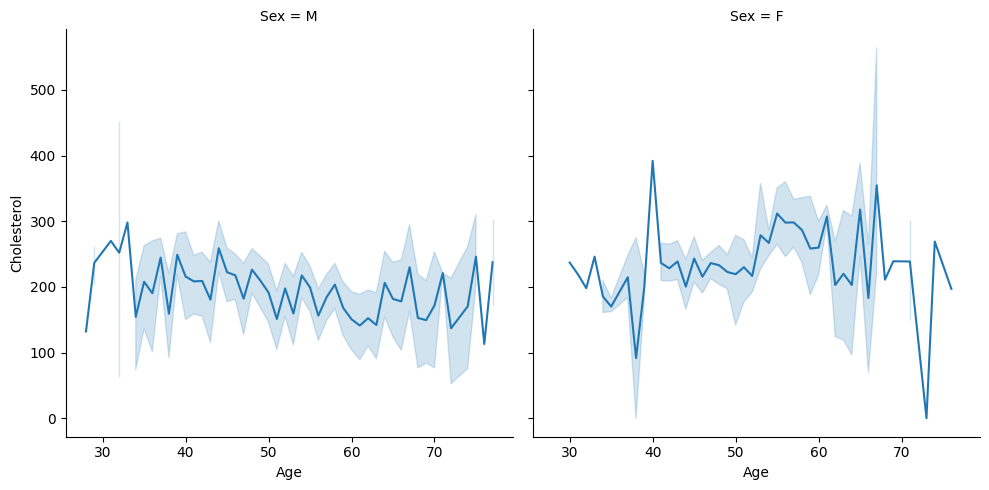

In [20]:
sns.relplot(data=df,x=df.Age,y=df.Cholesterol,kind='line',col=df.Sex)

In [21]:
pd.crosstab(df.Sex,df.FastingBS)

FastingBS,0,1
Sex,,
F,167,26
M,537,188


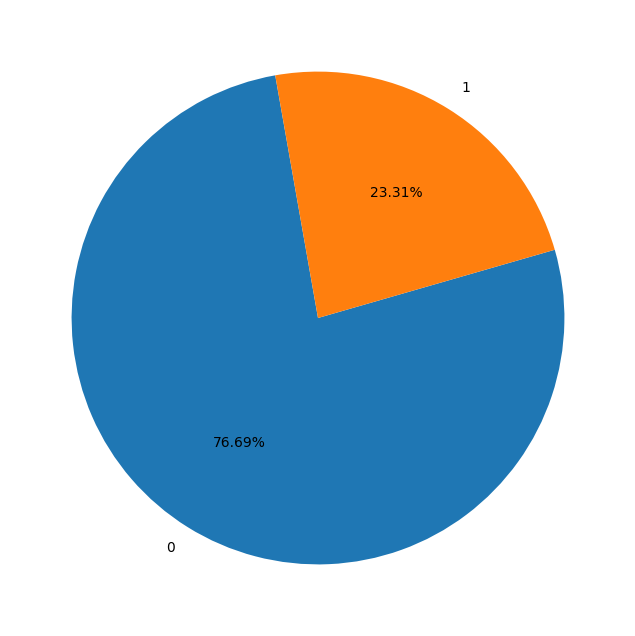

In [22]:
fastingbs_count=df.FastingBS.value_counts()
plt.figure(figsize=(16, 8))
plt.pie(fastingbs_count, labels=fastingbs_count.index, autopct='%1.2f%%', startangle=100)
plt.show()

<Axes: xlabel='FastingBS', ylabel='count'>

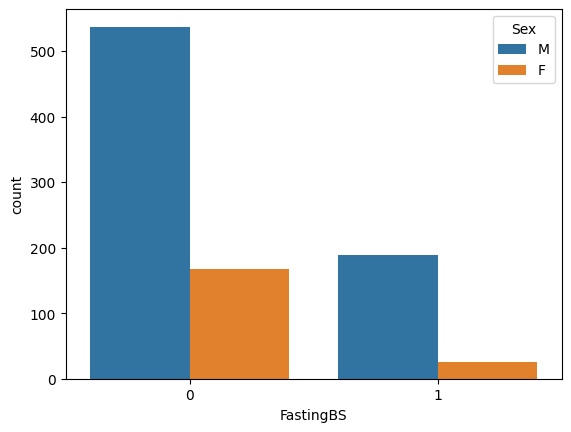

In [23]:
sns.countplot(data=df,x=df.FastingBS,hue=df.Sex)

In [24]:
df.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

<Axes: xlabel='RestingECG', ylabel='count'>

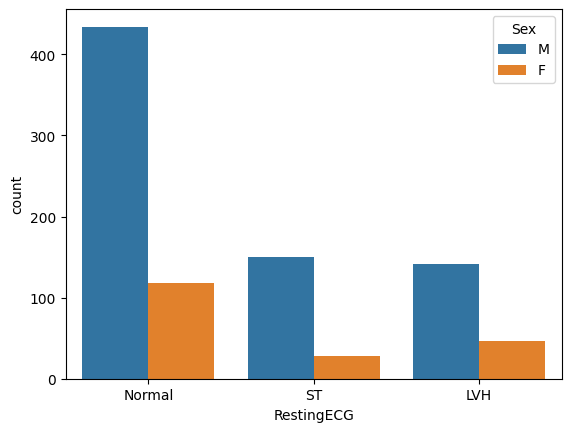

In [25]:
sns.countplot(data=df,x=df.RestingECG,hue=df.Sex)

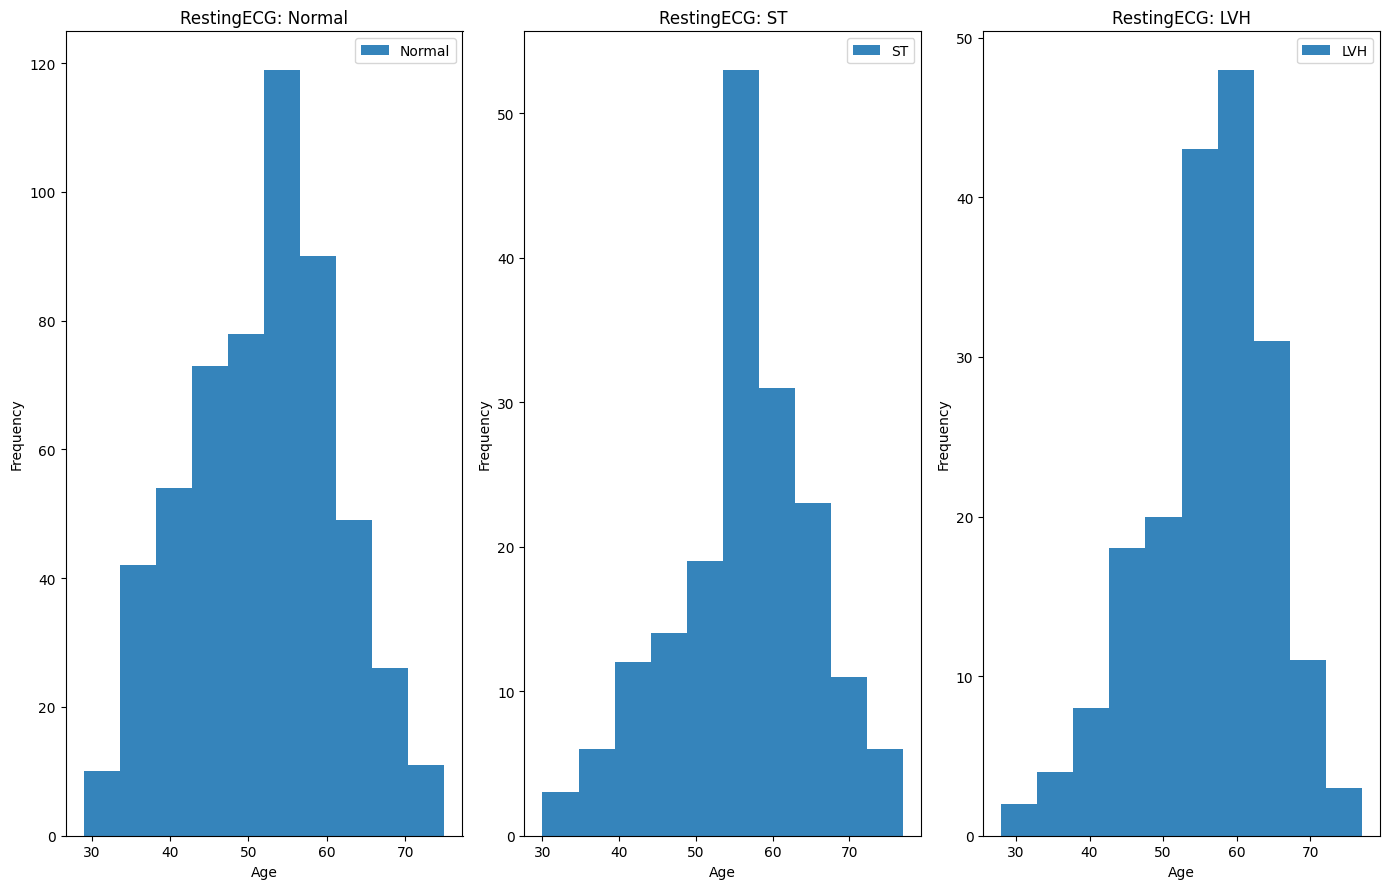

In [26]:
normal_age = df[df['RestingECG'] == 'Normal']['Age']
st_age = df[df['RestingECG'] == 'ST']['Age']
lvh_age = df[df['RestingECG'] == 'LVH']['Age']

plt.figure(figsize=(14, 9))  

plt.subplot(1, 3, 1)
plt.hist(normal_age, bins=10, alpha=0.9, label='Normal')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('RestingECG: Normal')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(st_age, bins=10, alpha=0.9, label='ST')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('RestingECG: ST')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(lvh_age, bins=10, alpha=0.9, label='LVH')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('RestingECG: LVH')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
df.MaxHR.describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

<Axes: xlabel='MaxHR', ylabel='Sex'>

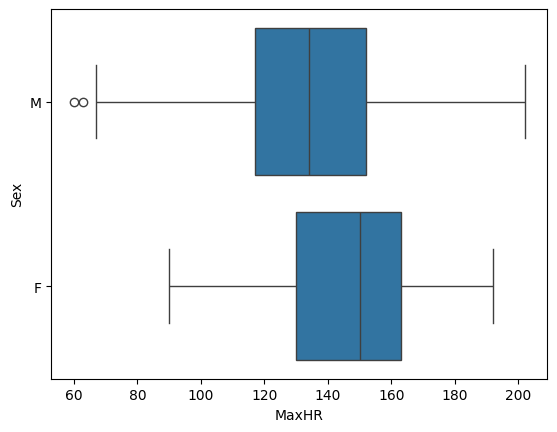

In [28]:
sns.boxplot(data=df,x=df.MaxHR,y=df.Sex)

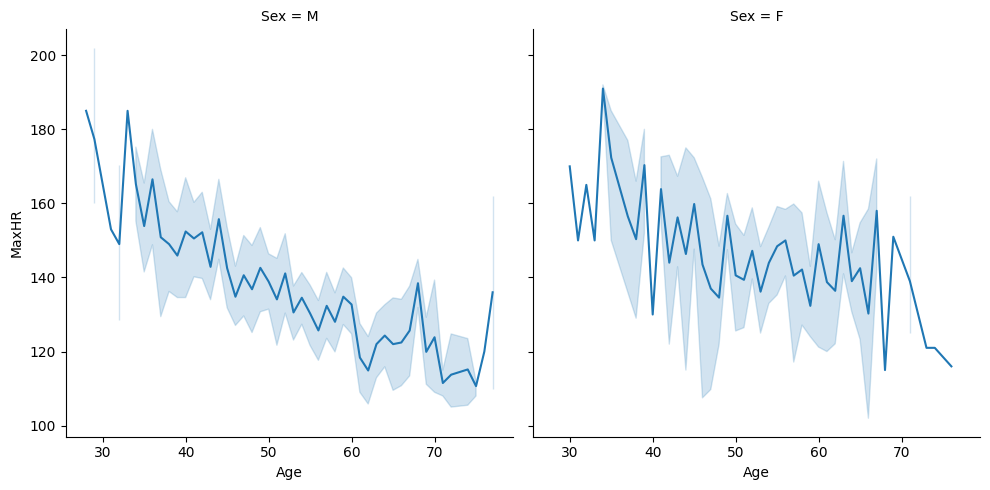

In [29]:
sns.relplot(data=df,x=df.Age,y=df.MaxHR,kind='line',col=df.Sex)

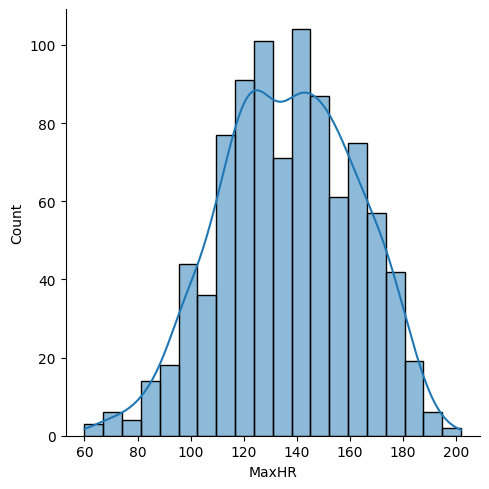

In [30]:
sns.displot(df['MaxHR'],kde =True)

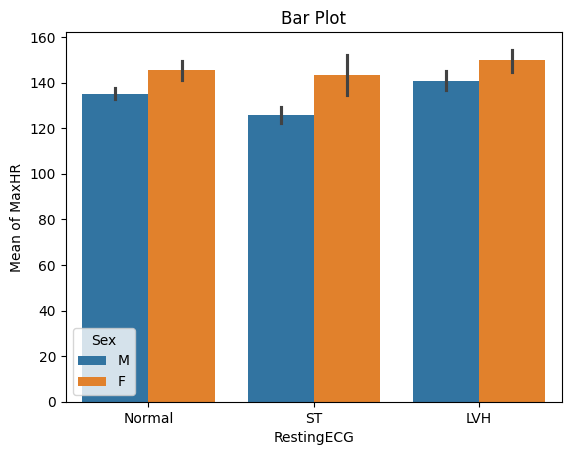

In [32]:
sns.barplot(x='RestingECG', y='MaxHR', data=df,hue=df.Sex)
plt.xlabel('RestingECG')
plt.ylabel('Mean of MaxHR')
plt.title('Bar Plot')
plt.show()

In [33]:
df.ExerciseAngina.value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [34]:
pd.crosstab(df.Sex,df.ExerciseAngina)

ExerciseAngina,N,Y
Sex,,
F,150,43
M,397,328


<Axes: xlabel='ExerciseAngina', ylabel='count'>

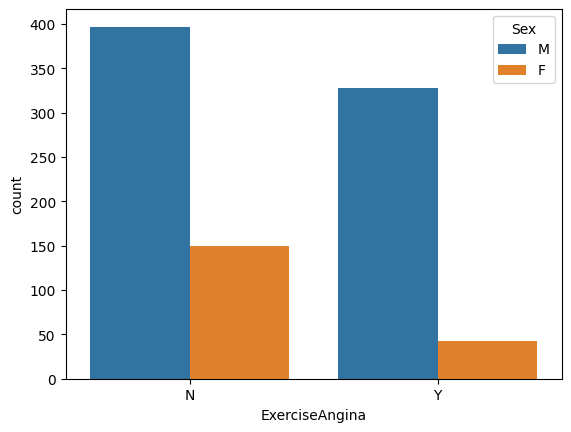

In [35]:
sns.countplot(data=df,x=df.ExerciseAngina,hue=df.Sex)

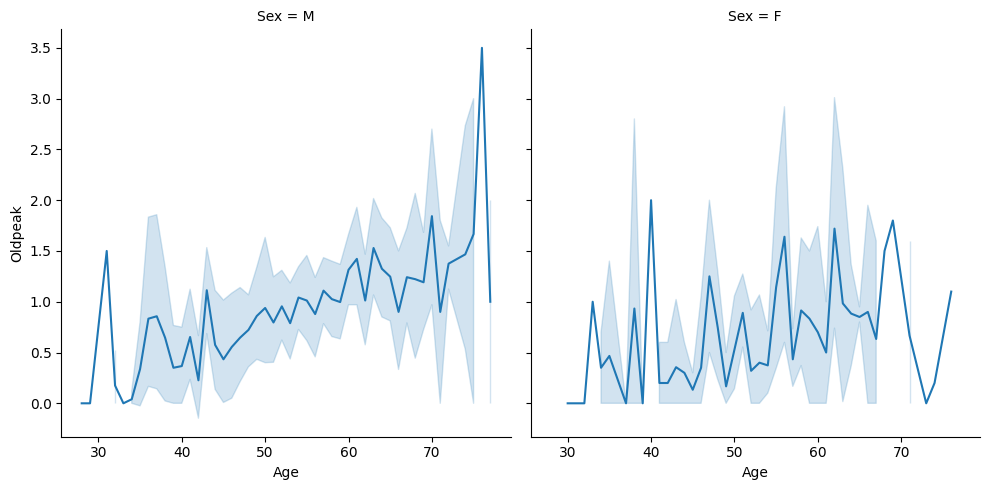

In [36]:
sns.relplot(data=df,x=df.Age,y=df.Oldpeak,kind='line',col=df.Sex)

<Axes: xlabel='Oldpeak'>

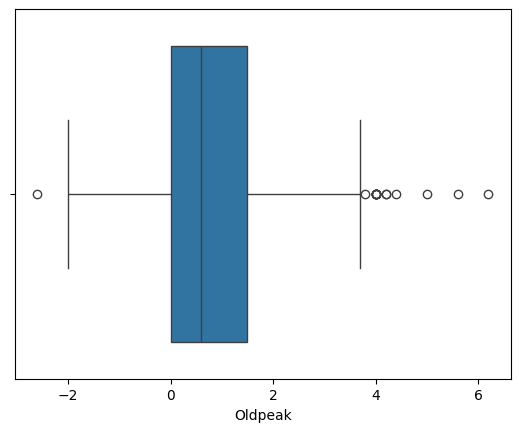

In [37]:
sns.boxplot(data=df,x=df.Oldpeak)

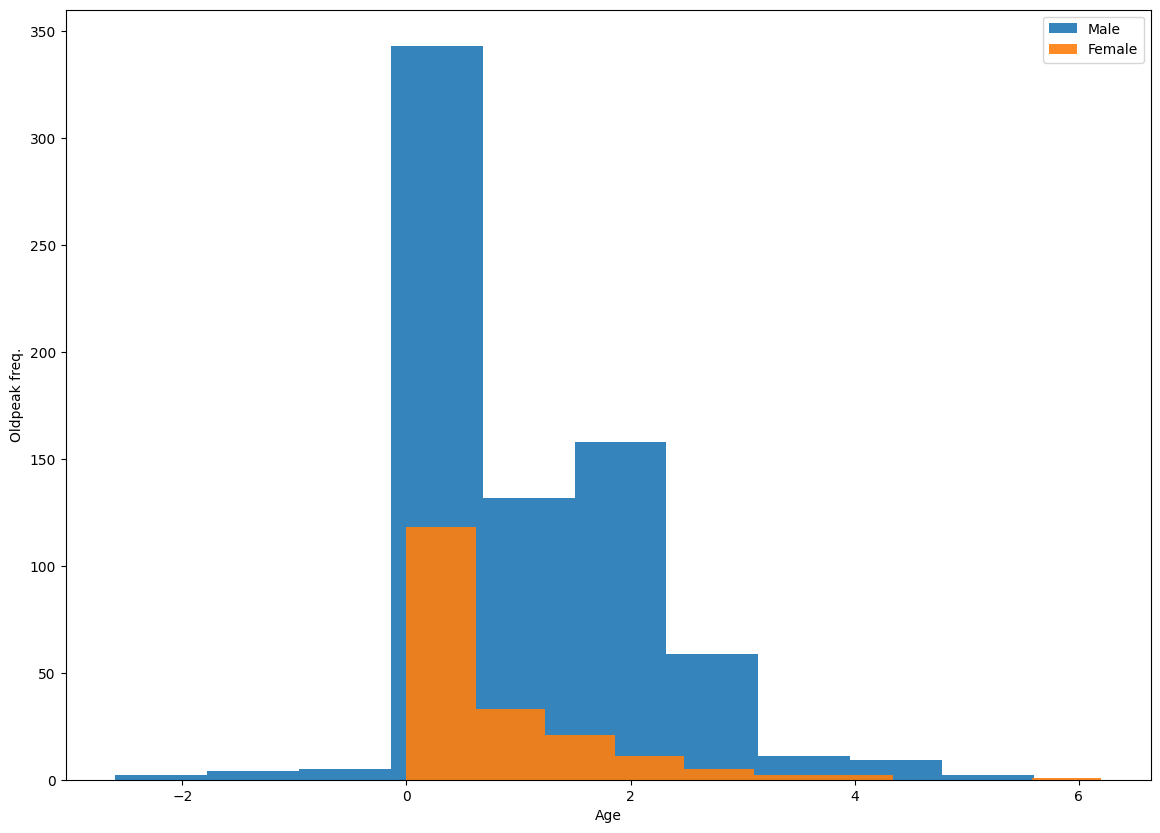

In [38]:
plt.figure(figsize=(14,10))
plt.hist(df[df['Sex'] == 'M']['Oldpeak'], bins=10, alpha=0.9, label='Male')
plt.hist(df[df['Sex'] == 'F']['Oldpeak'], bins=10, alpha=0.9, label='Female')
plt.xlabel('Age')
plt.ylabel('Oldpeak freq.')
plt.legend()
plt.show()

In [39]:
df.ST_Slope.value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [40]:
pd.crosstab(df.ST_Slope,df.Sex)

Sex,F,M
ST_Slope,,
Down,7,56
Flat,75,385
Up,111,284


<Axes: xlabel='ST_Slope', ylabel='count'>

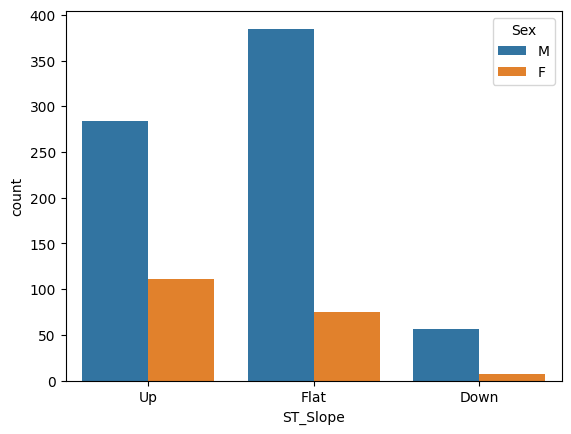

In [41]:
sns.countplot(data=df,x=df.ST_Slope,hue=df.Sex)

In [42]:
df.groupby('Sex')[['RestingBP', 'Cholesterol','MaxHR']].agg({'mean','std','median'})

RestingBP                   Cholesterol                          MaxHR  \
           mean        std median        mean         std median        mean   
Sex                                                                            
F    132.212435  19.392638  130.0  241.196891   85.195441  243.0  146.139896   
M    132.445517  18.286739  130.0  187.513103  112.351444  219.0  134.325517   

                       
           std median  
Sex                    
F    22.154902  150.0  
M    25.719191  134.0

In [43]:
Q1=df['RestingBP'].quantile(0.25)
Q3=df['RestingBP'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['RestingBP'][(df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)]
df = df.drop(outliers.index)




90.0


In [44]:
Q1=df['Cholesterol'].quantile(0.25)
Q3=df['Cholesterol'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['Cholesterol'][(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)]
df = df.drop(outliers.index)

37.0


In [45]:
Q1=df['MaxHR'].quantile(0.25)
Q3=df['MaxHR'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['MaxHR'][(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)]
df = df.drop(outliers.index)

65.0


In [46]:
Q1=df['Oldpeak'].quantile(0.25)
Q3=df['Oldpeak'].quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
outliers = df['Oldpeak'][(df['Oldpeak'] < lower_bound) | (df['Oldpeak'] > upper_bound)]
df = df.drop(outliers.index)

-2.25


<Axes: xlabel='MaxHR'>

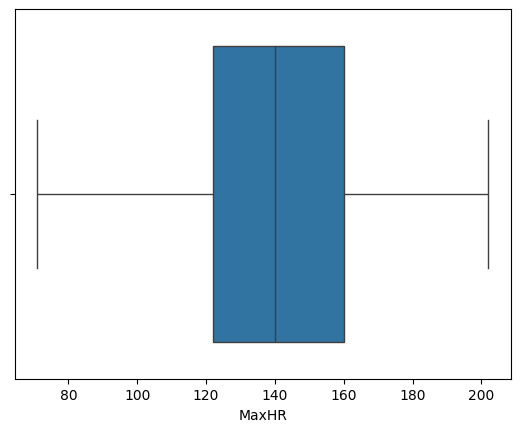

In [47]:
sns.boxplot(data=df,x=df.MaxHR)


<Axes: xlabel='RestingBP'>

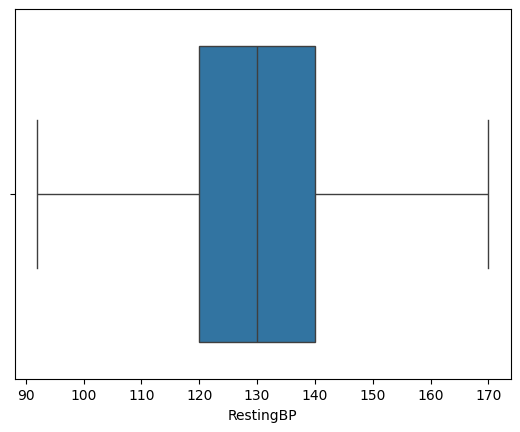

In [48]:
sns.boxplot(data=df,x=df.RestingBP)

<Axes: xlabel='Cholesterol'>

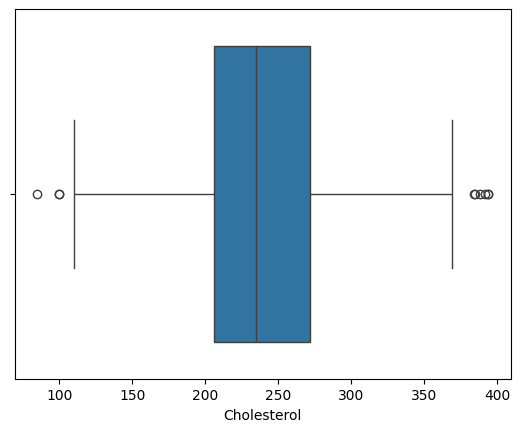

In [49]:
sns.boxplot(data=df,x=df.Cholesterol)


<Axes: xlabel='Oldpeak'>

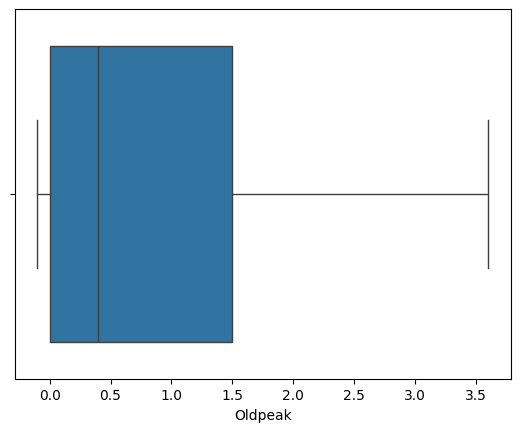

In [50]:
sns.boxplot(data=df,x=df.Oldpeak)

In [51]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [52]:
df["Sex"]=le.fit_transform(df["Sex"])
df["ChestPainType"]=le.fit_transform(df["ChestPainType"])
df["RestingECG"]=le.fit_transform(df["RestingECG"])
df["ExerciseAngina"]=le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"]=le.fit_transform(df["ST_Slope"])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [53]:
x=df.drop(columns='HeartDisease')
y=df.HeartDisease
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [54]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [55]:
y_pred = model_svm.predict(X_test)

In [56]:
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)

[[104  15]
 [ 17  75]]


In [57]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.8483412322274881


In [58]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       119
           1       0.83      0.82      0.82        92

    accuracy                           0.85       211
   macro avg       0.85      0.84      0.85       211
weighted avg       0.85      0.85      0.85       211



In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8483412322274881
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       119
           1       0.86      0.78      0.82        92

    accuracy                           0.85       211
   macro avg       0.85      0.84      0.84       211
weighted avg       0.85      0.85      0.85       211

[[107  12]
 [ 20  72]]
